In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv',index_col='PassengerId')

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.rename(columns={'SibSp':'Sibling_or_Spouse','Parch':'Parent_or_child','Pclass':'Class'},inplace=True)
df.head()

,Survived,Class,Name,Sex,Age,Sibling_or_Spouse,Parent_or_child,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Survived               0
Class                  0
Name                   0
Sex                    0
Age                  177
Sibling_or_Spouse      0
Parent_or_child        0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2
dtype: int64

In [8]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode())

In [9]:
df.describe(include='all')

,Survived,Class,Name,Sex,Age,Sibling_or_Spouse,Parent_or_child,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,205,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,5,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
df.count()

Survived             891
Class                891
Name                 891
Sex                  891
Age                  891
Sibling_or_Spouse    891
Parent_or_child      891
Ticket               891
Fare                 891
Cabin                205
Embarked             889
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           891 non-null    int64  
 1   Class              891 non-null    int64  
 2   Name               891 non-null    object 
 3   Sex                891 non-null    object 
 4   Age                891 non-null    float64
 5   Sibling_or_Spouse  891 non-null    int64  
 6   Parent_or_child    891 non-null    int64  
 7   Ticket             891 non-null    object 
 8   Fare               891 non-null    float64
 9   Cabin              205 non-null    object 
 10  Embarked           889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# Getting the most frequent 10 ages for people that were on the ship

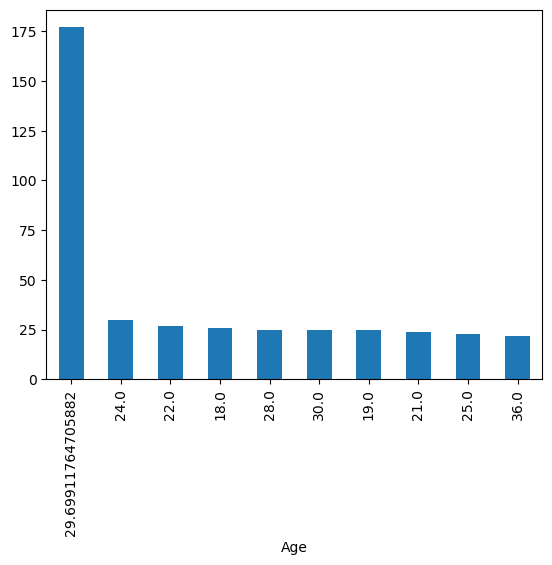

In [12]:
(df['Age'].value_counts(normalize=False)).head(10).plot(kind='bar');

## Getting the passengers' genders

In [13]:
(df['Sex'].value_counts(normalize=False))

Sex
male      577
female    314
Name: count, dtype: int64

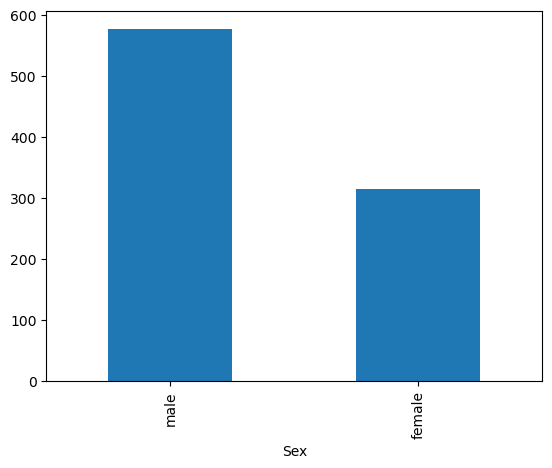

In [14]:
(df['Sex'].value_counts(normalize=False)).plot(kind='bar');

In [15]:
df['Age'].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

## Viewing detailed ages of passengers on the ship

In [16]:
with pd.option_context('display.max_rows', None):
    value_counts_result = df['Age'].value_counts()
    print(value_counts_result)

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
30.000000     25
19.000000     25
21.000000     24
25.000000     23
36.000000     22
29.000000     20
35.000000     18
32.000000     18
26.000000     18
27.000000     18
31.000000     17
16.000000     17
34.000000     15
20.000000     15
23.000000     15
33.000000     15
39.000000     14
40.000000     13
17.000000     13
42.000000     13
45.000000     12
38.000000     11
4.000000      10
2.000000      10
50.000000     10
44.000000      9
47.000000      9
48.000000      9
54.000000      8
9.000000       8
1.000000       7
51.000000      7
37.000000      6
52.000000      6
41.000000      6
3.000000       6
14.000000      6
49.000000      6
58.000000      5
15.000000      5
43.000000      5
62.000000      4
56.000000      4
8.000000       4
60.000000      4
11.000000      4
5.000000       4
6.000000       3
7.000000       3
65.000000      3
61.000000      3
46.000000      3
10.000000      2
64.000000 

In [17]:
survived_count=df['Survived'].value_counts()
survived_count

Survived
0    549
1    342
Name: count, dtype: int64

## We notice here that about 61% of the people on the ship didn't survive

<Axes: xlabel='Survived'>

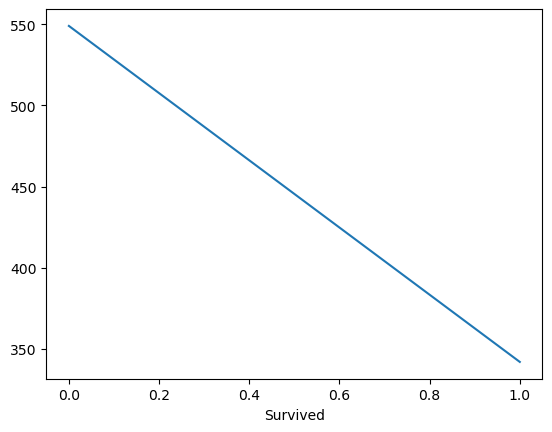

In [18]:
(df['Survived'].value_counts(normalize=False)).plot()

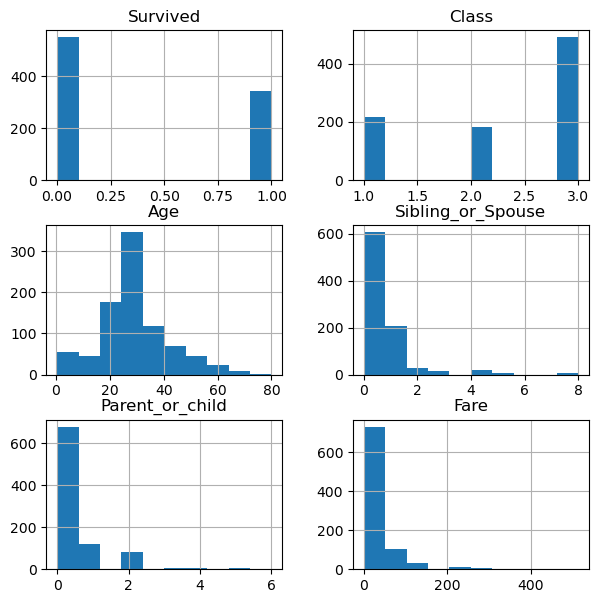

In [19]:
df.hist(figsize=(7,7));

In [20]:
df.groupby('Sex')['Age'].median()

Sex
female    29.699118
male      29.699118
Name: Age, dtype: float64

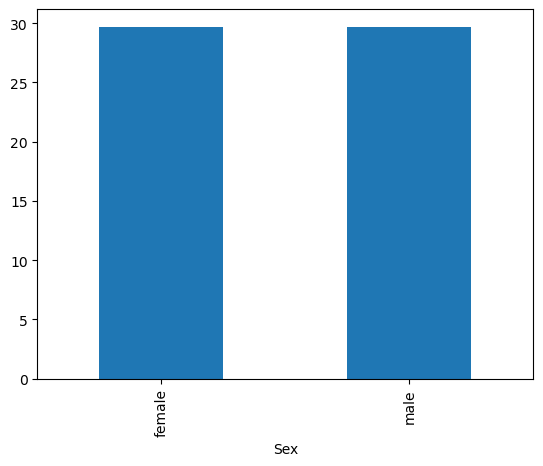

In [21]:
df.groupby('Sex')['Age'].median().plot.bar();

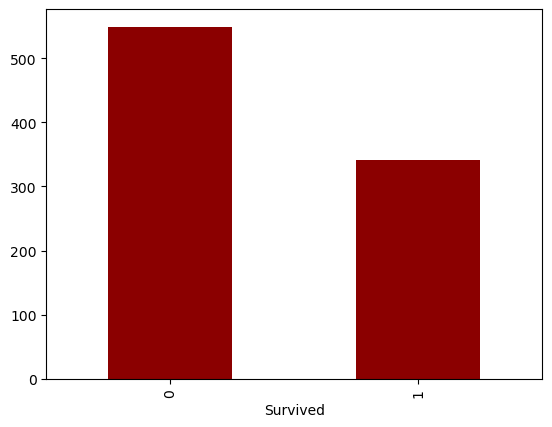

In [79]:
df['Survived'].value_counts().plot(kind='bar');

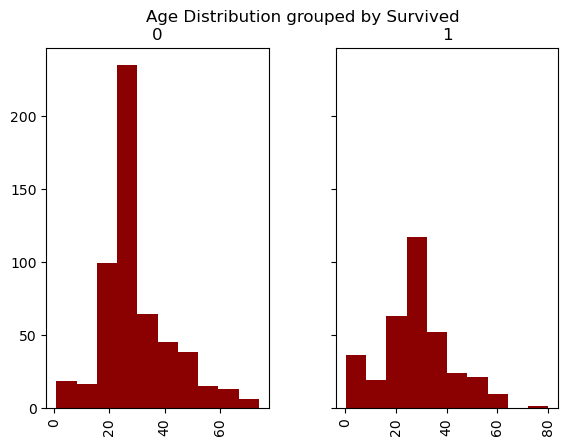

In [95]:
df.hist(column="Age",by="Survived",sharey=True,)
plt.suptitle('Age Distribution grouped by Survived');

In [23]:
df['Age'].groupby(df['Survived']).median()


Survived
0    29.699118
1    29.699118
Name: Age, dtype: float64

In [25]:
df['Age'].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

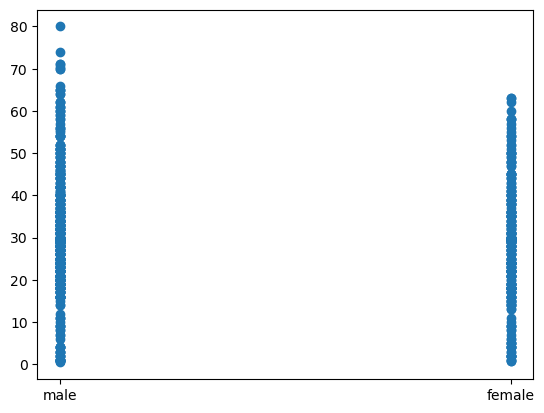

In [26]:
plt.scatter(df['Sex'],df['Age']);

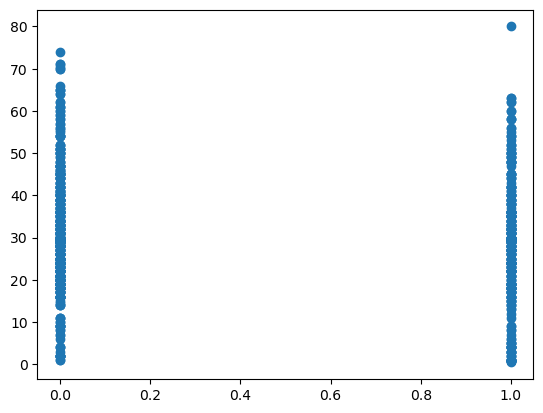

In [27]:
plt.scatter(df['Survived'],df['Age']);

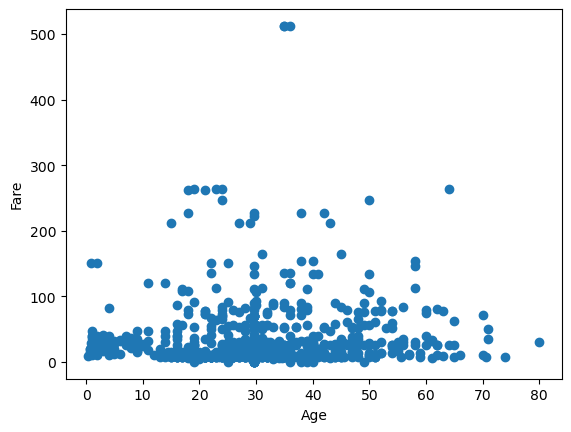

In [35]:
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [29]:
df['Parent_or_child'].value_counts()

Parent_or_child
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

## 678 (76%) of the passengers had no parents / children with them

In [30]:
 df[(df['Parent_or_child']==1) & (df['Survived']==1)].count()['Survived']

65

## Number of passenger who had a parent/child with them and survived

In [31]:
 df[(df['Sibling_or_Spouse']==1) & (df['Survived']==1)].count()['Survived']

112

## Number of passenger who had a spouse/sibling with them and survived

In [33]:
correlation = df[['Survived', 'Fare']].corr()
print(correlation)

          Survived      Fare
Survived  1.000000  0.257307
Fare      0.257307  1.000000


In [34]:
correlation_II = df[['Survived', 'Class','Parent_or_child','Parent_or_child']].corr()
print(correlation_II)

                 Survived     Class  Parent_or_child  Parent_or_child
Survived         1.000000 -0.338481         0.081629         0.081629
Class           -0.338481  1.000000         0.018443         0.018443
Parent_or_child  0.081629  0.018443         1.000000         1.000000
Parent_or_child  0.081629  0.018443         1.000000         1.000000


In [111]:
df['Sex_encoded']= df['Sex'].map({'male': 0, 'female': 1})

## Turning string values into integers to be used for heatmap

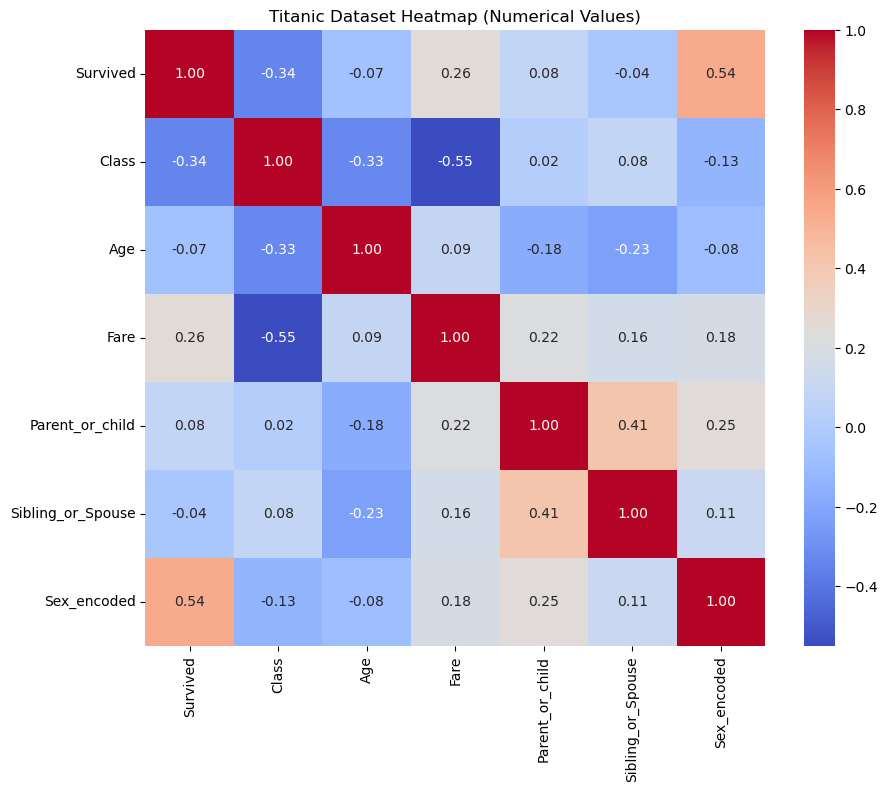

In [113]:
numerical_cols = ['Survived', 'Class', 'Age','Fare','Parent_or_child','Sibling_or_Spouse','Sex_encoded']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Titanic Dataset Heatmap (Numerical Values)")
plt.show()

### We notice a moderate negative correlation between fare and class also between class and survival
###  And a positive correlation between survival and sex
### Also a moderate positive correlation between the number of people who had siblings/spouses with them and those who had a parent/child with them.

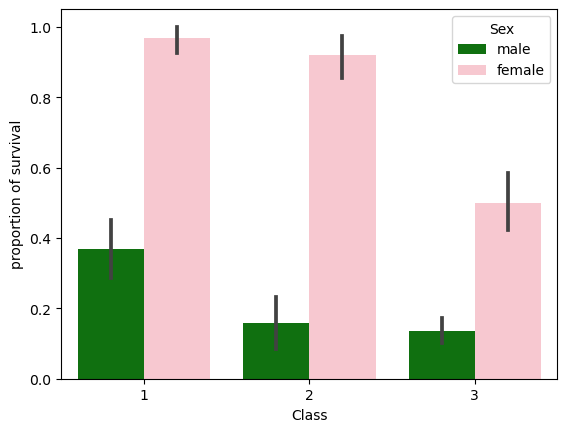

In [96]:
plt.figure()
sns.set_palette(sns.color_palette(('green','pink')))
sns.barplot(data=df, x="Class", hue='Sex', y='Survived', estimator=np.mean);
plt.ylabel('proportion of survival');

## Survival based on  Embarkation

In [59]:
df.loc[:,'Embarked'].replace(['C','S','Q'],['Cherbourg','Southampton','Queenstown'],inplace=True)

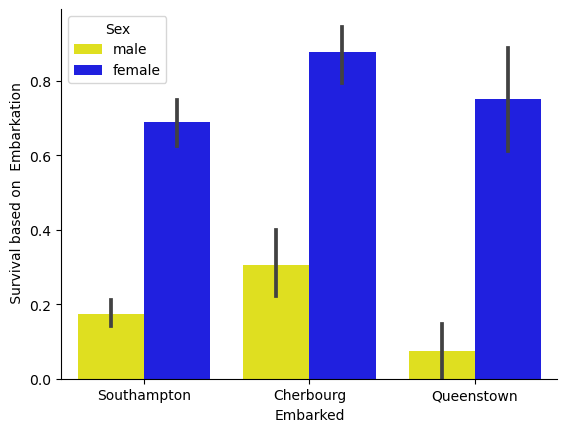

In [64]:
plt.figure()
sns.set_palette(sns.color_palette(('yellow', 'blue')))
sns.barplot(data=df, x="Embarked", hue='Sex', y='Survived', estimator=np.mean);
plt.ylabel(' Survival based on  Embarkation') 
sns.despine(top=True, right=True, left=False, bottom=False);

## Survivors and Non-Survivors by Sex

D:\anaconda\folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


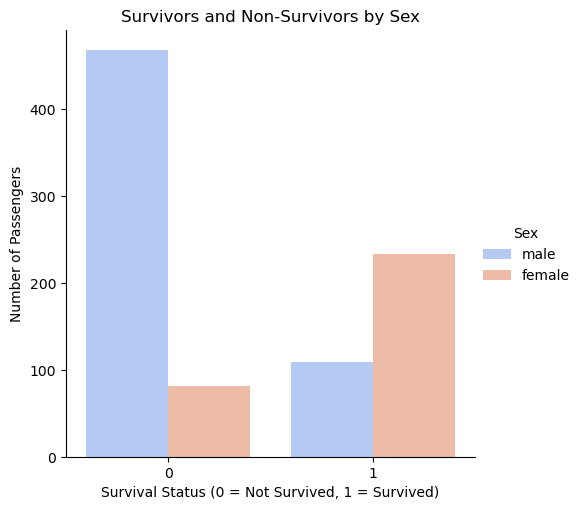

In [78]:
sns.catplot(data=df, kind="count", x="Survived", hue="Sex", palette="coolwarm")
plt.xlabel("Survival Status (0 = Not Survived, 1 = Survived)")
plt.ylabel("Number of Passengers")
plt.title("Survivors and Non-Survivors by Sex");

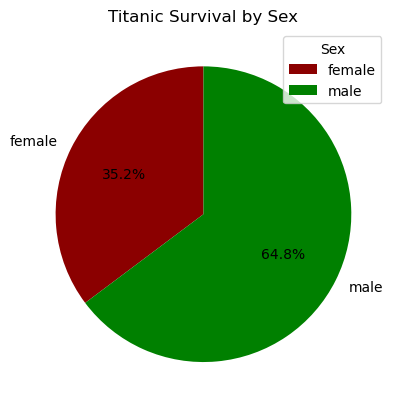

In [93]:
grouped_data = df.groupby(['Sex', 'Survived'])['Survived'].count().unstack()
plt.pie(grouped_data.sum(axis=1), labels=grouped_data.index, autopct="%1.1f%%", startangle=90)
plt.title("Titanic Survival by Sex")
plt.legend(title="Sex", loc="best")
plt.show()

## I hope this notebook inspires others to explore it further. Feel free to reach out with any questions!